<a href="https://colab.research.google.com/github/samirgadkari/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

    100% |████████████████████████████████| 215kB 23.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Number of Instances: 306

---


Number of Attributes: 4 (including the class attribute)

---
Missing Attribute Values: None

---




Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year


In [2]:
patients_raw = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                           header = None)
print(patients_raw.dtypes)
print(patients_raw.describe())
print(patients_raw.head(20))

0    int64
1    int64
2    int64
3    int64
dtype: object
                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
     0   1   2  3
0   30  64   1  1
1   30  62   3  1
2   30  65   0  1
3   31  59   2  1
4   31  65   4  1
5   33  58  10  1
6   33  60   0  1
7   34  59   0  2
8   34  66   9  2
9   34  58  30  1
10  34  60   1  1
11  34  61  10  1
12  34  67   7  1
13  34  60   0  1
14  35  64  13  1
15  35  63   0  1
16  36  60   1  1
17  36  69   0  1
18  37  60   0  1
19  37  63   0  1


In [5]:
col_names = ['age', 'year', 'num-pos-nodes', 'survived']
patients = patients_raw.copy()
patients.columns = col_names
patients['survived'] = patients_raw['survived'].map({1: 1, 2: 0})  # I see an error here, by the rest of the sheet still works. Dont know why !!!
print(list(patients['survived']))
patients['survived'] = patients['survived'].astype('category')
patients['survived'].dtype

KeyError: ignored

In [6]:
patients.head(5)

,age,year,num-pos-nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [7]:
patients.describe()

,age,year,num-pos-nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


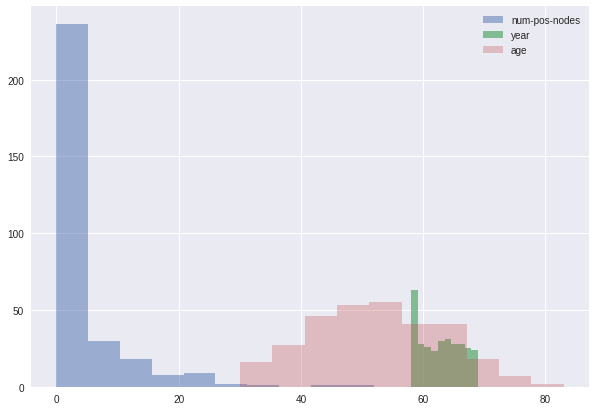

In [8]:
# Column 2 shows max value of 52. That's 52 nodes.
# Check if this is really true

plt.figure(figsize = (10, 7))
plt.hist(patients['num-pos-nodes'], alpha = 0.5, label = 'num-pos-nodes')
plt.hist(patients['year'], alpha = 0.7, label = 'year')
plt.hist(patients['age'], alpha = 0.3, label = 'age')
plt.legend()
plt.show()

(array([236.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

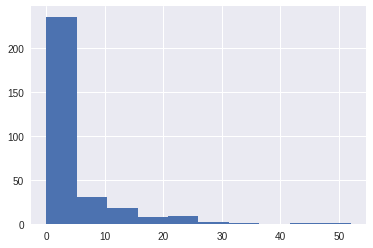

In [9]:
plt.hist(patients['num-pos-nodes'])

In [0]:
age_bins = pd.cut(patients.age, 6)
year_bins = pd.cut(patients['year'], 3)
nodes_bins = pd.cut(patients['num-pos-nodes'], [0, 5, 25, 53])
age_nodes_survival = pd.crosstab([age_bins, nodes_bins], 
                                 patients['survived'], normalize = 'index')

In [11]:
age_nodes_survival

survived                               1         2
age              num-pos-nodes                    
(29.947, 38.833] (0, 5]         1.000000  0.000000
                 (5, 25]        0.777778  0.222222
                 (25, 53]       1.000000  0.000000
(38.833, 47.667] (0, 5]         0.739130  0.260870
                 (5, 25]        0.533333  0.466667
                 (25, 53]       0.000000  1.000000
(47.667, 56.5]   (0, 5]         0.743590  0.256410
                 (5, 25]        0.347826  0.652174
                 (25, 53]       1.000000  0.000000
(56.5, 65.333]   (0, 5]         0.647059  0.352941
                 (5, 25]        0.538462  0.461538
                 (25, 53]       0.500000  0.500000
(65.333, 74.167] (0, 5]         0.500000  0.500000
                 (5, 25]        0.400000  0.600000
                 (25, 53]       0.000000  0.000000
(74.167, 83.0]   (0, 5]         0.500000  0.500000
                 (5, 25]        0.000000  0.000000
                 (25, 53]       0.000000  0.000000

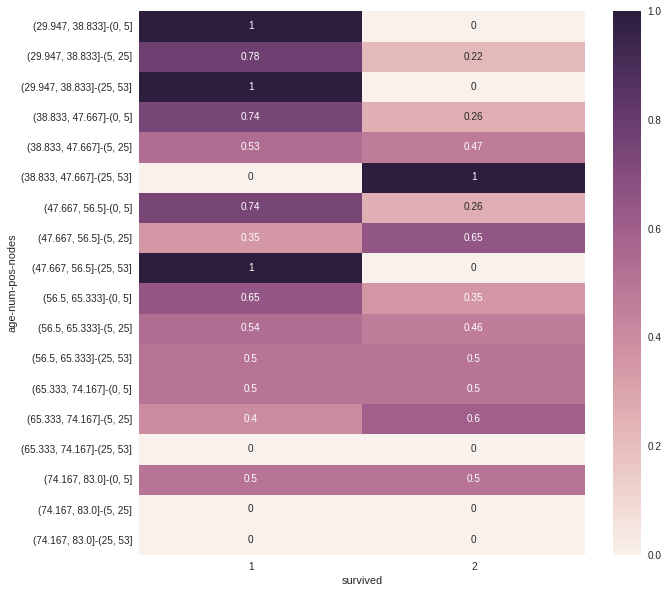

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(age_nodes_survival, annot = True);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?


---


From the heatmaps, we find that the survival rate is higher if the patient is younger.


---


- What is at least one feature that looks to have a negative correlation with survival?


---


From the heatmaps, we find that the survival rate is lower if the patient has more positive nodes.


---


- How are those two features related with each other, and what might that mean?


---


It makes sense.  You would expect if the number of positive nodes are higher, the patient has less chances of survival.  But younger patients could still survive for longer.  Since survival was specified as greater than 5 years, maybe more younger patients survive because they're younger, and thus healthier.


Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Other things I tried

In [0]:
nodes_year_survival = pd.crosstab([nodes_bins, year_bins], 
                                  patients['survived'], normalize = 'index')
age_year_survival = pd.crosstab([age_bins, year_bins], 
                                patients['survived'], normalize = 'index')

In [18]:
nodes_year_survival

survived                               1         2
num-pos-nodes year                                
(0, 5]        (57.989, 61.667]  0.760870  0.239130
              (61.667, 65.333]  0.709677  0.290323
              (65.333, 69.0]    0.695652  0.304348
(5, 25]       (57.989, 61.667]  0.545455  0.454545
              (61.667, 65.333]  0.407407  0.592593
              (65.333, 69.0]    0.562500  0.437500
(25, 53]      (57.989, 61.667]  0.666667  0.333333
              (61.667, 65.333]  0.000000  1.000000
              (65.333, 69.0]    1.000000  0.000000

In [19]:
age_year_survival

survived                                  1         2
age              year                                
(29.947, 38.833] (57.989, 61.667]  0.941176  0.058824
                 (61.667, 65.333]  1.000000  0.000000
                 (65.333, 69.0]    0.714286  0.285714
(38.833, 47.667] (57.989, 61.667]  0.769231  0.230769
                 (61.667, 65.333]  0.633333  0.366667
                 (65.333, 69.0]    0.647059  0.352941
(47.667, 56.5]   (57.989, 61.667]  0.742857  0.257143
                 (61.667, 65.333]  0.612903  0.387097
                 (65.333, 69.0]    0.750000  0.250000
(56.5, 65.333]   (57.989, 61.667]  0.750000  0.250000
                 (61.667, 65.333]  0.714286  0.285714
                 (65.333, 69.0]    0.866667  0.133333
(65.333, 74.167] (57.989, 61.667]  0.600000  0.400000
                 (61.667, 65.333]  0.600000  0.400000
                 (65.333, 69.0]    0.923077  0.076923
(74.167, 83.0]   (57.989, 61.667]  0.000000  1.000000
                 (61.667, 65.333]  0.666667  0.333333
                 (65.333, 69.0]    1.000000  0.000000

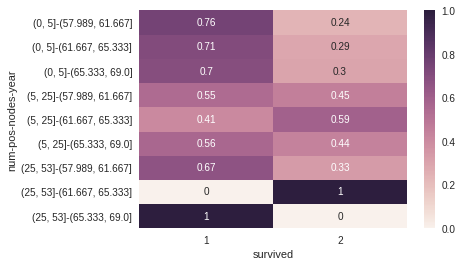

In [20]:
sns.heatmap(nodes_year_survival, annot = True);

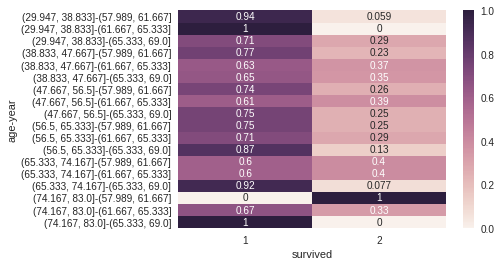

In [21]:
sns.heatmap(age_year_survival, annot = True);